# **Deep Learning - Keras-Tensorflow**

In [1]:
# importando bibliotecas
import numpy as np
import matplotlib.pyplot as plt
import tensorflow
from tensorflow import keras
from tensorflow.keras.models import load_model

In [2]:
# carregando o dataset
dados = keras.datasets.fashion_mnist
((img_treino, labels_treino), (img_teste, labels_teste)) = dados.load_data()

## Conhecendo melhor os nossos dados



In [3]:
img_treino.shape

(60000, 28, 28)

In [4]:
img_teste.shape

(10000, 28, 28)

In [5]:
print(f'Min id: {labels_treino.min()}')
print(f'Max id: {labels_treino.max()}')

Min id: 0
Max id: 9


In [6]:
total_de_labels = 10
nomes_labels = ['Camiseta', 'Calça', 'Pullover', 
                'Vestido', 'Casaco', 'Sandália', 'Camisa',
                'Tênis', 'Bolsa', 'Bota'] #informação retirada do https://github.com/zalandoresearch/fashion-mnist

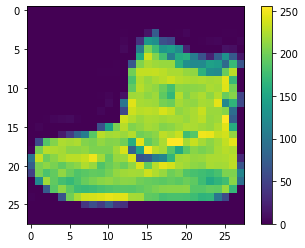

In [7]:
# visualizando nossas imagens
plt.imshow(img_treino[0])
plt.colorbar()
plt.show()

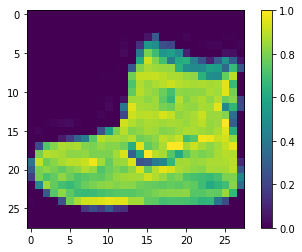

In [8]:
# normalizando as imagens
img_treino = img_treino / float(255)

plt.imshow(img_treino[0])
plt.colorbar()
plt.show()

## Criando, compilando, treinando e normalizando o modelo

In [9]:
modelo = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), #entrada
    keras.layers.Dense(256, activation=tensorflow.nn.relu), #camada oculta
    keras.layers.Dropout(0.2), #camada oculta
    keras.layers.Dense(10, activation=tensorflow.nn.softmax) #saída
])

adam = keras.optimizers.Adam(lr=0.002)
callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss'),
             keras.callbacks.ModelCheckpoint(filepath='melhor_modelo.hdf5',
                                             monitor='val_loss',
                                             save_best_only=True)]

modelo.compile(optimizer=adam,
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

historico = modelo.fit(img_treino, labels_treino, 
                       batch_size = 480, epochs=5,
                       validation_split=0.2, callbacks=callbacks
                       )

Epoch 1/5
100/100 [==============================] - 2s 15ms/step - loss: 0.6378 - accuracy: 0.7770 - val_loss: 0.4631 - val_accuracy: 0.8370
Epoch 2/5
100/100 [==============================] - 1s 14ms/step - loss: 0.4362 - accuracy: 0.8464 - val_loss: 0.3961 - val_accuracy: 0.8603
Epoch 3/5
100/100 [==============================] - 1s 14ms/step - loss: 0.3898 - accuracy: 0.8606 - val_loss: 0.3820 - val_accuracy: 0.8670
Epoch 4/5
100/100 [==============================] - 1s 14ms/step - loss: 0.3644 - accuracy: 0.8688 - val_loss: 0.3550 - val_accuracy: 0.8713
Epoch 5/5
100/100 [==============================] - 1s 14ms/step - loss: 0.3385 - accuracy: 0.8771 - val_loss: 0.3526 - val_accuracy: 0.8747


In [10]:
# sumário do modelo
sumario_do_modelo = modelo.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [11]:
pesos_camada_dense = modelo.layers[1].get_weights()[0]
pesos_camada_dense

array([[-0.03475954, -0.0708861 , -0.10527902, ...,  0.06660415,
        -0.07895739,  0.00707756],
       [-0.06877338, -0.01865678, -0.05862473, ..., -0.03233273,
        -0.01490407,  0.03341922],
       [-0.00692695, -0.03854222, -0.02875997, ...,  0.020714  ,
         0.05103088, -0.00489914],
       ...,
       [ 0.07952617,  0.0915361 , -0.14984795, ...,  0.04518891,
         0.03549114, -0.03909726],
       [ 0.07792767,  0.15109274, -0.04379598, ..., -0.03410535,
         0.04031953,  0.04267595],
       [-0.09182709,  0.13146897,  0.02262694, ..., -0.05767448,
         0.08707291, -0.03705522]], dtype=float32)

In [12]:
vieses_camada_dense = modelo.layers[1].get_weights()[1]
vieses_camada_dense

array([ 0.00911871, -0.03745826, -0.13627602,  0.11120404,  0.05201637,
        0.11268267,  0.06333737,  0.21528369, -0.01614734, -0.01436956,
        0.00033335, -0.15512136,  0.06393541, -0.10805944,  0.14991789,
       -0.01146179, -0.01411232, -0.01014536,  0.08482157,  0.20639902,
       -0.00982247,  0.01249494, -0.08480378, -0.01584036,  0.02666261,
        0.01820038,  0.0354995 , -0.01735859, -0.0083655 ,  0.04779839,
       -0.02168217,  0.01680491,  0.04056375,  0.14974733,  0.05803086,
        0.08466677,  0.2554244 ,  0.03115829, -0.0075419 ,  0.06462476,
        0.19735414, -0.08551834,  0.1421248 ,  0.02707705,  0.04190117,
        0.09392364,  0.1318415 ,  0.17134725, -0.00915291,  0.16859446,
       -0.0863253 ,  0.010572  ,  0.22681911,  0.1497312 ,  0.0282499 ,
       -0.06313755,  0.12119143,  0.1636418 ,  0.1800228 ,  0.00201854,
        0.000519  ,  0.1606885 ,  0.1248501 ,  0.03167919,  0.07286797,
        0.03823005,  0.06366335, -0.1072264 ,  0.04411455, -0.01

In [13]:
modelo.get_config()

{'build_input_shape': TensorShape([None, 28, 28]),
 'layers': [{'class_name': 'Flatten',
   'config': {'batch_input_shape': (None, 28, 28),
    'data_format': 'channels_last',
    'dtype': 'float32',
    'name': 'flatten',
    'trainable': True}},
  {'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'dtype': 'float32',
    'kernel_constraint': None,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'kernel_regularizer': None,
    'name': 'dense',
    'trainable': True,
    'units': 256,
    'use_bias': True}},
  {'class_name': 'Dropout',
   'config': {'dtype': 'float32',
    'name': 'dropout',
    'noise_shape': None,
    'rate': 0.2,
    'seed': None,
    'trainable': True}},
  {'class_name': 'Dense',
   'config': {'activation': 'softmax',
    'activity_regularizer': None,
  

In [14]:
# salvando o modelo treinado
modelo.save('modelo.h5')
modelo_salvo = load_model('modelo.h5')

**Visualizando as acurácias de treino e validação por época** 

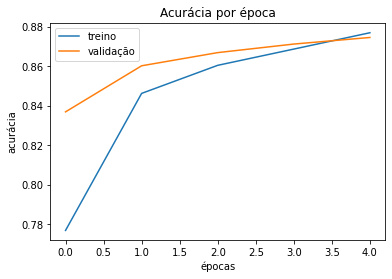

In [15]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por época')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino', 'validação'])
plt.show()

**Visualizando as perdas de treino e validação por época**  

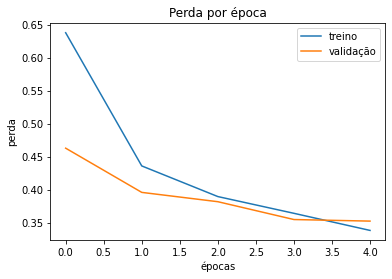

In [16]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por época')
plt.xlabel('épocas')
plt.ylabel('perda')
plt.legend(['treino', 'validação'])
plt.show()

**Testando o modelo e o modelo salvo**  

In [17]:
teste = modelo.predict(img_teste)
print(f'Resultado do teste: {np.argmax(teste[0])}')
print(f'Número da imagem do teste: {labels_teste[0]}')

Resultado do teste: 9
Número da imagem do teste: 9


In [18]:
teste_modelo_salvo = modelo_salvo.predict(img_teste)
print(f'Resultado do teste: {np.argmax(teste_modelo_salvo[0])}')
print(f'Número da imagem do teste: {labels_teste[0]}')

Resultado do teste: 9
Número da imagem do teste: 9


**Avaliando o modelo** 

In [19]:
perda_teste, acuracia_teste = modelo.evaluate(img_teste, labels_teste)
print(f'Perda teste: {perda_teste}')
print(f'Acurácia teste: {acuracia_teste}')

313/313 [==============================] - 0s 2ms/step - loss: 53.0014 - accuracy: 0.8547
Perda teste: 53.001373291015625
Acurácia teste: 0.8547000288963318


Materiais de apoio: https://cursos.alura.com.br/course/deep-learning-introducao-com-keras